качаем библиотеки

In [1]:
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

#### Проект
Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [3]:
### для загрузки данных
with open(r'project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

**Задача 1**<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

In [16]:
pr1 = np.array(product1)
pr2 = np.array(product2)

print(f'Mean of Product1 is -> {pr1.mean()}')
print(f'Mean of Product2 is -> {pr2.mean()}')


Mean of Product1 is -> 199.103
Mean of Product2 is -> 193.5


In [11]:
print(f'Median of Product1 is -> {np.median(pr1)}')
print(f'Median of Product2 is -> {np.median(pr2)}')

Median of Product1 is -> 198.5
Median of Product2 is -> 194.5


In [14]:
print(f'Mode of Product1 is -> {(statistics.mode(pr1))}')
print(f'Mode of Product2 is -> {statistics.mode(pr2)}')

Mode of Product1 is -> 186
Mode of Product2 is -> 227


Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

## Ответ
- 1. Мода будет наименее показательной, потому что она может сильно отклоняться от реальной средней выручки (в случае с продуктом 1 мода — 186, что значительно ниже средней выручки). Мода не всегда отражает общие тенденции, а скорее фокусируется на наиболее частых значениях.
- 2. Первый продукт показывает больше результаты и в итоге приносить больше результата в компании.

**Задача 2**<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [17]:
print(f'Стандартное отклонение Product1 -> {np.std(pr1)}')
print(f'Стандартное отклонение Product2 -> {np.std(pr2)}')

Стандартное отклонение Product1 -> 28.793964489107783
Стандартное отклонение Product2 -> 29.589018233121557


Оценка первого продукта больее точна чем вторая потому что она имеет меньшее стандартное отклоние чем Product 2.

**Задача 3**<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

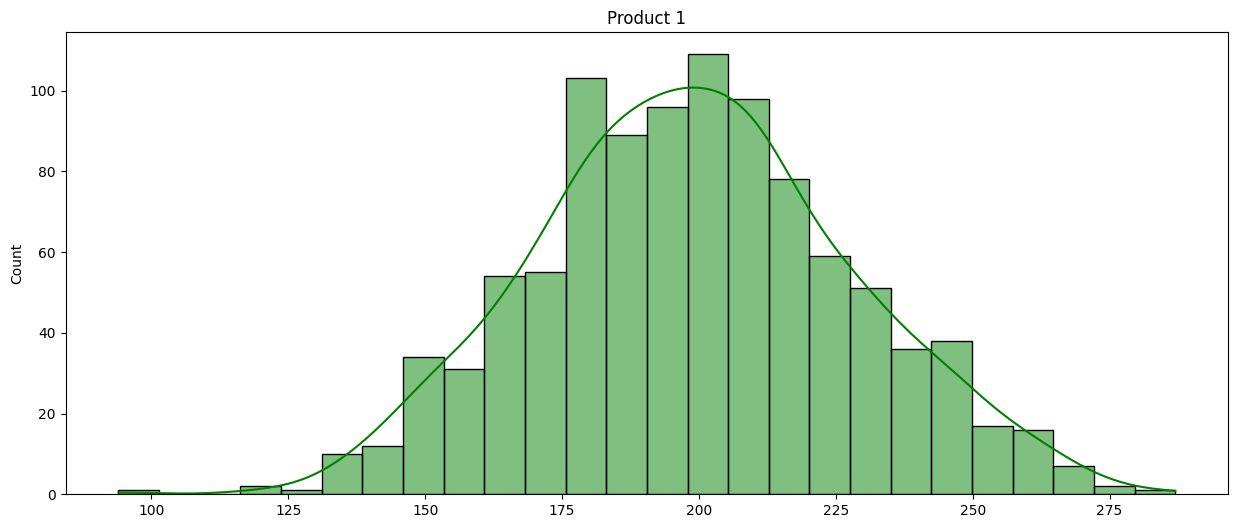

In [23]:
plt.figure(figsize=(15,6))
sns.histplot(data=product1,kde=True,color='green')
plt.title('Product 1')
plt.ylabel('Count')
plt.show()

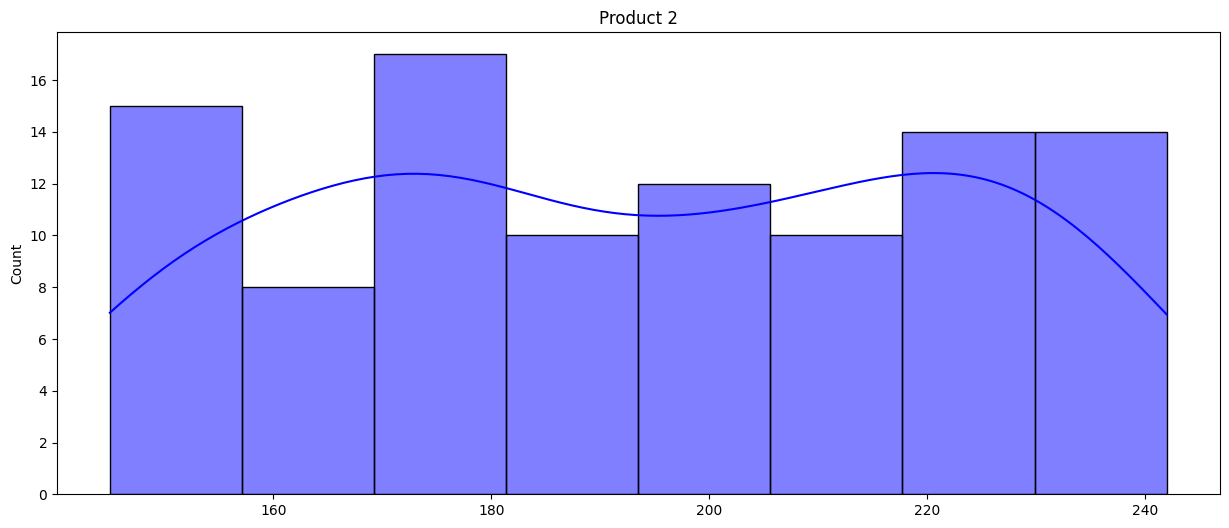

In [25]:
plt.figure(figsize=(15,6))
sns.histplot(data=product2,kde=True,color='blue')
plt.title('Product 2')
plt.ylabel('Count')
plt.show()

**Задача 4**<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [27]:
range_product_1 = len(pr1)
range_product_2 = len(pr2)

print(f'Размах выручки для продукта 1 -> {range_product_1}')
print(f'Размах выручки для продукта 2 -> {range_product_2}')



Размах выручки для продукта 1 -> 1000
Размах выручки для продукта 2 -> 100


Разница в размахах и стандартных отклонениях может быть объяснена наличием выбросов или экстремальных значений в данных. Стандартное отклонение в данном случае дает более стабильную картину отклонений, в то время как размах сильно чувствителен к выбросам.

**Задача 5**<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [39]:
def find_IQR(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1 

    return IQR

IQR1 = find_IQR(pr1)
IQR2 = find_IQR(pr2)

print(f'IQR for Product 1 is -> {IQR1}')
print(f'IQR for Product 2 is -> {IQR2}')



IQR for Product 1 is -> 38.25
IQR for Product 2 is -> 51.0


In [40]:
def remove_outliers(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data <= upper_bound ) & (data >= lower_bound)]

    return filtered_data

filtered_pr1 = remove_outliers(pr1)
filtered_pr2 = remove_outliers(pr2)




**Задача 6**<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

<Axes: title={'center': 'Product 1'}>

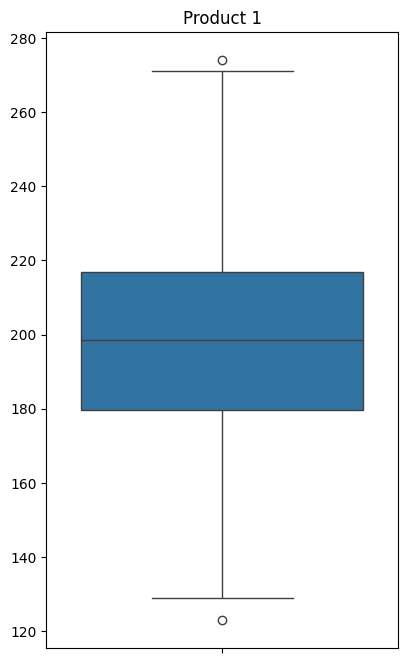

In [42]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('Product 1')
sns.boxplot(filtered_pr1)



Выбросы начинаются при значениях когда она больше чем ~270, и когда она меньше чем ~130.

**Задача 7**<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

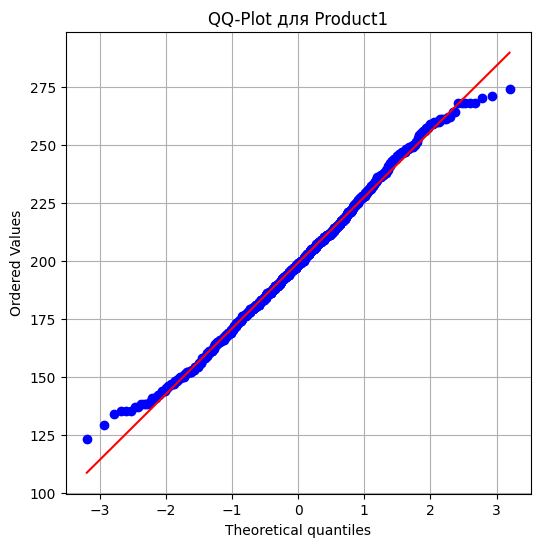

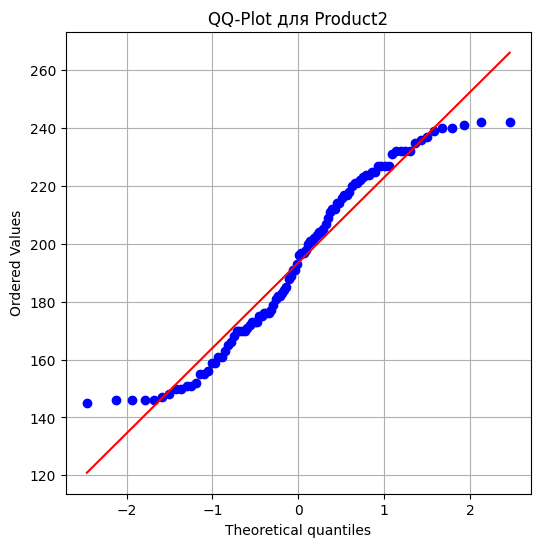

In [43]:
import scipy.stats as stats

def qq_plot(data, product_name):
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)  # Сравниваем с нормальным распределением
    plt.title(f'QQ-Plot для {product_name}')
    plt.grid(True)
    plt.show()

# QQ-plot для обоих продуктов
qq_plot(filtered_pr1, "Product1")
qq_plot(filtered_pr2, "Product2")

Первый является нормальным распределением

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

Тут наблюдается то что данные распрделенные хаотично то есть не похоже на нормальное распределение

**Задача 8**<br>
И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

In [46]:
pr1_mean = np.mean(pr1)
pr1_std = np.std(pr2)

pr1_normalized = (pr1 - pr1_mean) / pr1_std



Нарисуйте kdeplot нового стандартного распределения

<Axes: ylabel='Count'>

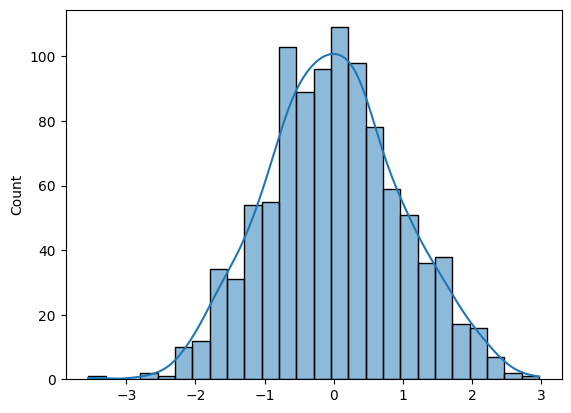

In [48]:
sns.histplot(data=pr1_normalized,kde=True)

**Задача 9**<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

In [49]:
percentile_1 = stats.norm.ppf(0.01)

print(f"Точка, слева от которой 1% вероятности: {percentile_1}")


Точка, слева от которой 1% вероятности: -2.3263478740408408


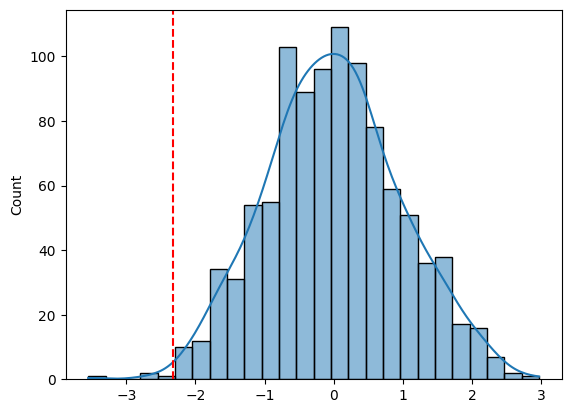

In [50]:
sns.histplot(data=pr1_normalized,kde=True)
plt.axvline(percentile_1, linestyle='--',color='red')

Первое значение в списке product1 равно 94. Когда мы преобразуем список в стандартное нормальное распределение, 94 преобразуется в -3.65<br>
Что нам говорит это число, особенно при сравнении с точкой которую мы только что подсчитали?

-3.65 — это значение, которое значительно меньше, чем -2.33. Это означает, что значение 94 в вашем наборе данных находится дальше от среднего, чем точка, которая охватывает 1% всего распределения. То есть 94 — это редкое или экстремальное значение в контексте вашего распределения, лежащее в левом хвосте.

В контексте нормального распределения значение -3.65 на самом деле очень низкое: по статистике, значения ниже -3 (если бы это было стандартное нормальное распределение) встречаются крайне редко, примерно в 0.13% случаев. Это говорит о том, что 94 является выбросом или крайне редким значением в контексте распределения данных о выручке.

**Задача 10**<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

In [52]:
print(np.mean(pr2))

193.5


Подсчитайте 95% доверительный интервал

In [53]:
mean_revenue_product2 = np.mean(pr2)
std_revenue_product2 = np.std(pr2, ddof=1)  # Используем ddof=1 для оценки стандартного отклонения по выборке
n = len(pr2)

# Критическое значение Z для 95% доверительного интервала
z_score = stats.norm.ppf(0.975)  # для 95% интервала, 0.975 соответствует верхней половине

# Расчёт доверительного интервала
margin_of_error = z_score * (std_revenue_product2 / np.sqrt(n))
confidence_interval = (mean_revenue_product2 - margin_of_error, mean_revenue_product2 + margin_of_error)

print(f"95% доверительный интервал: {confidence_interval}")

95% доверительный интервал: (187.6714429838974, 199.3285570161026)


**Задача11**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

In [56]:
import numpy as np
from scipy import stats


revenue_product1 = pr2

mu_0 = 197.5  

mean_revenue_product1 = np.mean(revenue_product1)
std_revenue_product1 = np.std(revenue_product1, ddof=1)  
n = len(revenue_product1)

# Рассчитываем t-статистику
t_statistic = (mean_revenue_product1 - mu_0) / (std_revenue_product1 / np.sqrt(n))

# Определяем критическое значение для 1-стороннего теста с уровнем значимости 5%
alpha = 0.05
df = n - 1  # Степени свободы
critical_value = stats.t.ppf(1 - alpha, df)  # Критическое значение для правостороннего теста

# Выводим результаты
print(f"t-статистика: {t_statistic}")
print(f"Критическое значение t для уровня значимости {alpha}: {critical_value}")

# Сравниваем t-статистику с критическим значением
if t_statistic > critical_value:
    print("Отказываем от нулевой гипотезы. Средняя выручка продукта1 статистически значимо выше 197.5.")
else:
    print("Не можем отказаться от нулевой гипотезы. Нет доказательств того, что средняя выручка продукта1 выше 197.5.")


t-статистика: -1.3450766487315813
Критическое значение t для уровня значимости 0.05: 1.6603911559963895
Не можем отказаться от нулевой гипотезы. Нет доказательств того, что средняя выручка продукта1 выше 197.5.


Какой это был типа АБ теста?

One sample t-test

**Задача12**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

In [57]:
import numpy as np
from scipy import stats

# Пример данных о выручке для продукта1 и продукта2
revenue_product1 = pr1
revenue_product2 = pr2

mean1 = np.mean(revenue_product1)
mean2 = np.mean(revenue_product2)
std1 = np.std(revenue_product1, ddof=1)
std2 = np.std(revenue_product2, ddof=1)
n1 = len(revenue_product1)
n2 = len(revenue_product2)

# Вычисляем t-статистику для двух выборок
t_statistic = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Определяем степени свободы для двух выборок
df = ((std1**2 / n1 + std2**2 / n2)**2) / (((std1**2 / n1)**2 / (n1 - 1)) + ((std2**2 / n2)**2 / (n2 - 1)))

# Критическое значение t для двустороннего теста с уровнем значимости 5%
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)  # для двустороннего теста

# Выводим результаты
print(f"t-статистика: {t_statistic}")
print(f"Критическое значение t для уровня значимости {alpha}: {critical_value}")

# Сравниваем t-статистику с критическим значением
if abs(t_statistic) > critical_value:
    print("Отказываем от нулевой гипотезы. Средняя выручка продукта1 и продукта2 статистически различаются.")
else:
    print("Не можем отказаться от нулевой гипотезы. Нет доказательств того, что средняя выручка продукта1 и продукта2 различаются.")


t-статистика: 1.8014812850572308
Критическое значение t для уровня значимости 0.05: 1.9802115980645558
Не можем отказаться от нулевой гипотезы. Нет доказательств того, что средняя выручка продукта1 и продукта2 различаются.
